In [ ]:
!pip install numpy pandas scikit-fuzzy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.5 MB/s eta 0:00:00


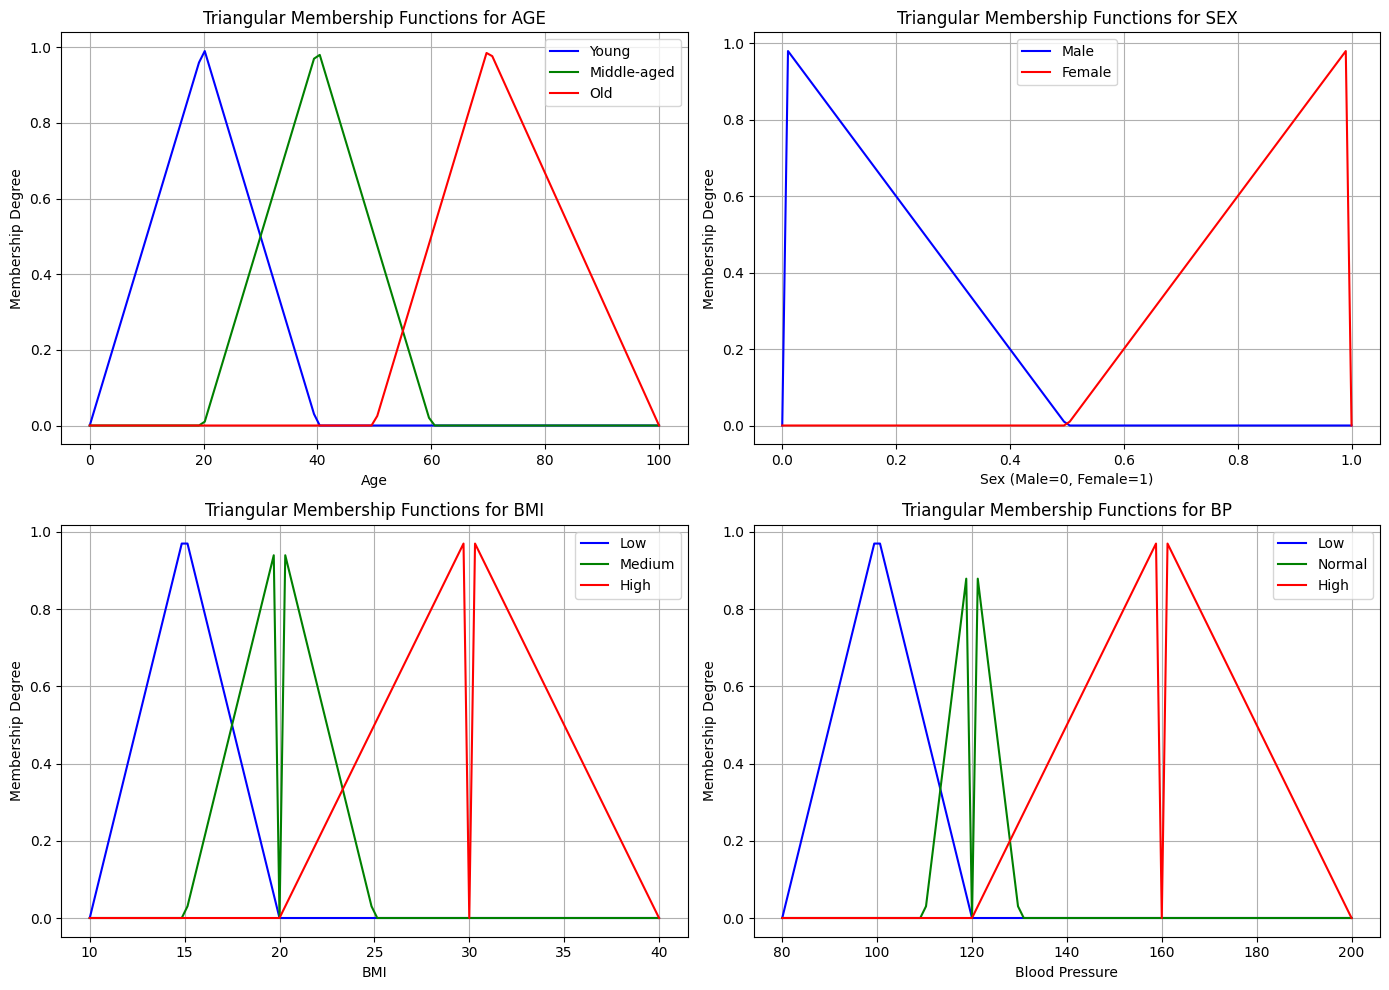

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the triangular membership function
def triangular_membership(x, a, b, c):
    """
    Triangular membership function, where:
    a = left point of the triangle
    b = peak of the triangle
    c = right point of the triangle
    """
    if x <= a or x >= c:
        return 0
    elif a < x < b:
        return (x - a) / (b - a)
    elif b < x < c:
        return (c - x) / (c - b)
    else:
        return 0

# Define the range of values for each feature
age_values = np.linspace(0, 100, 100)  # Age between 0 and 100
sex_values = np.linspace(0, 1, 100)  # Sex is binary (0 for male, 1 for female)
bmi_values = np.linspace(10, 40, 100)  # BMI between 10 and 40
bp_values = np.linspace(80, 200, 100)  # Blood Pressure between 80 and 200

# Define fuzzy sets for AGE: "Young", "Middle-aged", "Old"
young_age = [triangular_membership(x, 0, 20, 40) for x in age_values]
middle_age = [triangular_membership(x, 20, 40, 60) for x in age_values]
old_age = [triangular_membership(x, 50, 70, 100) for x in age_values]

# Define fuzzy sets for SEX: "Male", "Female"
male_sex = [triangular_membership(x, 0, 0, 0.5) for x in sex_values]
female_sex = [triangular_membership(x, 0.5, 1, 1) for x in sex_values]

# Define fuzzy sets for BMI: "Low", "Medium", "High"
low_bmi = [triangular_membership(x, 10, 15, 20) for x in bmi_values]
medium_bmi = [triangular_membership(x, 15, 20, 25) for x in bmi_values]
high_bmi = [triangular_membership(x, 20, 30, 40) for x in bmi_values]

# Define fuzzy sets for BP: "Low", "Normal", "High"
low_bp = [triangular_membership(x, 80, 100, 120) for x in bp_values]
normal_bp = [triangular_membership(x, 110, 120, 130) for x in bp_values]
high_bp = [triangular_membership(x, 120, 160, 200) for x in bp_values]

# Plot all the fuzzy sets in one figure
plt.figure(figsize=(14, 10))

# Plot AGE fuzzy sets
plt.subplot(2, 2, 1)
plt.plot(age_values, young_age, label='Young', color='blue')
plt.plot(age_values, middle_age, label='Middle-aged', color='green')
plt.plot(age_values, old_age, label='Old', color='red')
plt.title('Triangular Membership Functions for AGE')
plt.xlabel('Age')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)

# Plot SEX fuzzy sets
plt.subplot(2, 2, 2)
plt.plot(sex_values, male_sex, label='Male', color='blue')
plt.plot(sex_values, female_sex, label='Female', color='red')
plt.title('Triangular Membership Functions for SEX')
plt.xlabel('Sex (Male=0, Female=1)')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)

# Plot BMI fuzzy sets
plt.subplot(2, 2, 3)
plt.plot(bmi_values, low_bmi, label='Low', color='blue')
plt.plot(bmi_values, medium_bmi, label='Medium', color='green')
plt.plot(bmi_values, high_bmi, label='High', color='red')
plt.title('Triangular Membership Functions for BMI')
plt.xlabel('BMI')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)

# Plot BP fuzzy sets
plt.subplot(2, 2, 4)
plt.plot(bp_values, low_bp, label='Low', color='blue')
plt.plot(bp_values, normal_bp, label='Normal', color='green')
plt.plot(bp_values, high_bp, label='High', color='red')
plt.title('Triangular Membership Functions for BP')
plt.xlabel('Blood Pressure')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)

# Show all plots
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Load the dataset
file_path = "Bonus -- diabetes.data.xlsx"  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Define min and max for each feature
feature_ranges = data.describe().loc[['min', 'max', 'mean']]

# Define fuzzy variables with appropriate ranges
age = ctrl.Antecedent(np.linspace(feature_ranges.loc['min', 'AGE'], feature_ranges.loc['max', 'AGE'], 100), 'AGE')
sex = ctrl.Antecedent([1, 2], 'SEX')  # Discrete values
bmi = ctrl.Antecedent(np.linspace(feature_ranges.loc['min', 'BMI'], feature_ranges.loc['max', 'BMI'], 100), 'BMI')
bp = ctrl.Antecedent(np.linspace(feature_ranges.loc['min', 'BP'], feature_ranges.loc['max', 'BP'], 100), 'BP')
output = ctrl.Consequent(np.linspace(feature_ranges.loc['min', 'Y'], feature_ranges.loc['max', 'Y'], 100), 'Y')

# Define membership functions for AGE
age['young'] = fuzz.trimf(age.universe, [feature_ranges.loc['min', 'AGE'], feature_ranges.loc['min', 'AGE'], feature_ranges.loc['mean', 'AGE']])
age['middle'] = fuzz.trimf(age.universe, [feature_ranges.loc['min', 'AGE'], feature_ranges.loc['mean', 'AGE'], feature_ranges.loc['max', 'AGE']])
age['old'] = fuzz.trimf(age.universe, [feature_ranges.loc['mean', 'AGE'], feature_ranges.loc['max', 'AGE'], feature_ranges.loc['max', 'AGE']])

# SEX is discrete: 1 = Male, 2 = Female
sex['male'] = fuzz.trimf(sex.universe, [1, 1, 1.5])  # Membership function for Male
sex['female'] = fuzz.trimf(sex.universe, [1.5, 2, 2])  # Membership function for Female

# Define membership functions for BMI
bmi['low'] = fuzz.trimf(bmi.universe, [feature_ranges.loc['min', 'BMI'], feature_ranges.loc['min', 'BMI'], feature_ranges.loc['mean', 'BMI']])
bmi['medium'] = fuzz.trimf(bmi.universe, [feature_ranges.loc['min', 'BMI'], feature_ranges.loc['mean', 'BMI'], feature_ranges.loc['max', 'BMI']])
bmi['high'] = fuzz.trimf(bmi.universe, [feature_ranges.loc['mean', 'BMI'], feature_ranges.loc['max', 'BMI'], feature_ranges.loc['max', 'BMI']])

# Define membership functions for BP
bp['low'] = fuzz.trimf(bp.universe, [feature_ranges.loc['min', 'BP'], feature_ranges.loc['min', 'BP'], feature_ranges.loc['mean', 'BP']])
bp['medium'] = fuzz.trimf(bp.universe, [feature_ranges.loc['min', 'BP'], feature_ranges.loc['mean', 'BP'], feature_ranges.loc['max', 'BP']])
bp['high'] = fuzz.trimf(bp.universe, [feature_ranges.loc['mean', 'BP'], feature_ranges.loc['max', 'BP'], feature_ranges.loc['max', 'BP']])

# Define membership functions for output (Y)
output['low'] = fuzz.trimf(output.universe, [feature_ranges.loc['min', 'Y'], feature_ranges.loc['min', 'Y'], feature_ranges.loc['mean', 'Y']])
output['medium'] = fuzz.trimf(output.universe, [feature_ranges.loc['min', 'Y'], feature_ranges.loc['mean', 'Y'], feature_ranges.loc['max', 'Y']])
output['high'] = fuzz.trimf(output.universe, [feature_ranges.loc['mean', 'Y'], feature_ranges.loc['max', 'Y'], feature_ranges.loc['max', 'Y']])

# Define meaningful fuzzy rules
rule1 = ctrl.Rule(age['old'] & bmi['high'] & bp['high'], output['high'])
rule2 = ctrl.Rule(age['young'] & bmi['low'] & bp['low'], output['low'])
rule3 = ctrl.Rule(sex['male'] & age['middle'] & bmi['medium'], output['medium'])
# Adding more rules
rule4 = ctrl.Rule(age['middle'] & bmi['high'] & bp['medium'], output['medium'])
rule5 = ctrl.Rule(sex['female'] & age['young'] & bmi['low'], output['low'])

# Create control system
diabetes_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
diabetes_sim = ctrl.ControlSystemSimulation(diabetes_ctrl)

# Split the dataset into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Step 1: Generate fuzzy outputs for each input data point (training set)
X_train = []
y_train = []

for _, row in train_data.iterrows():
    diabetes_sim.input['AGE'] = row['AGE']
    diabetes_sim.input['SEX'] = row['SEX']
    diabetes_sim.input['BMI'] = row['BMI']
    diabetes_sim.input['BP'] = row['BP']

    # Perform inference before accessing the output
    diabetes_sim.compute()

    # Collect fuzzy output value and input features
    output_value = diabetes_sim.output.get('Y', None)  # Use .get to safely handle missing keys

    # If the output is None or NaN, skip the row or handle it
    if output_value is not None:
        X_train.append([row['AGE'], row['SEX'], row['BMI'], row['BP']])
        y_train.append(output_value)

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Step 2: Ensure no NaN values exist in the training data
if np.any(np.isnan(X_train)) or np.any(np.isnan(y_train)):
    print("Warning: NaN values detected in the training data.")

# Step 3: Train a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Step 4: Test the system with the Random Forest model on test data
X_test = []
y_test = []

for _, row in test_data.iterrows():
    diabetes_sim.input['AGE'] = row['AGE']
    diabetes_sim.input['SEX'] = row['SEX']
    diabetes_sim.input['BMI'] = row['BMI']
    diabetes_sim.input['BP'] = row['BP']

    # Perform inference
    diabetes_sim.compute()

    # Collect fuzzy output value and input features
    output_value = diabetes_sim.output.get('Y', None)

    # If the output is not None, append the values
    if output_value is not None:
        X_test.append([row['AGE'], row['SEX'], row['BMI'], row['BP']])
        y_test.append(output_value)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Make predictions on the test set using Random Forest
y_pred = regressor.predict(X_test)

# Evaluate the Random Forest model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Mean Squared Error: {mse}")
print(f"Random Forest R-squared: {r2}")

# Test a sample from the dataset
sample = test_data.iloc[0]  # First row of the test dataset
print(f"Sample from the test dataset:\n {sample}")
diabetes_sim.input['AGE'] = sample['AGE']
diabetes_sim.input['SEX'] = sample['SEX']
diabetes_sim.input['BMI'] = sample['BMI']
diabetes_sim.input['BP'] = sample['BP']

# Perform inference and get predicted output using regression model
diabetes_sim.compute()
fuzzy_output = diabetes_sim.output['Y']
regression_output = regressor.predict([[sample['AGE'], sample['SEX'], sample['BMI'], sample['BP']]])

print(f"Predicted Y on a sample from the test data (fuzzy): {fuzzy_output:.2f}")
print(f"Predicted Y on a sample from the test data (Random Forest): {regression_output[0]:.2f}")


Random Forest Mean Squared Error: 46.02536425436779
Random Forest R-squared: 0.962682584875377
Sample from the test dataset:
 AGE     61.0000
SEX      1.0000
BMI     25.8000
BP      90.0000
S1     280.0000
S2     195.4000
S3      55.0000
S4       5.0000
S5       4.9972
S6      90.0000
Y      219.0000
Name: 287, dtype: float64
Predicted Y on a sample from the test data (fuzzy): 177.02
Predicted Y on a sample from the test data (Random Forest): 176.93
